# PART A #

#  Data Understanding & Exploration #

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
#1 A Read ‘Car name.csv’ as a DataFrame and assign it to a variable

car_df= pd.read_csv("/Users/apple/Downloads/Carname.csv")

In [3]:
car_df.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
#1 B Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

import json


file_path = "/Users/apple/Downloads/Car-Attributes.json"

# Read the JSON file
with open(file_path) as f:
    data = json.load(f)

# Convert JSON data to DataFrame and store the data in cars_df
cars_df = pd.DataFrame(data)


In [5]:
cars_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
#1 C Merge both the DataFrames together to form a single DataFrame

# Add a common key to each DataFrame
car_df['key'] = 0
cars_df['key'] = 0

# Perform the cross-join
merged_df = pd.merge(car_df, cars_df, on='key')

# Drop the 'key' column
merged_df.drop('key', axis=1, inplace=True)

# Display the merged DataFrame
merged_df.head()


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,chevrolet chevelle malibu,15.0,8,350.0,165,3693,11.5,70,1
2,chevrolet chevelle malibu,18.0,8,318.0,150,3436,11.0,70,1
3,chevrolet chevelle malibu,16.0,8,304.0,150,3433,12.0,70,1
4,chevrolet chevelle malibu,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
#1 D Print 5 point summary of the numerical features and share insights
merged_df.describe()


,mpg,cyl,disp,wt,acc,yr,origin
count,158404.000000,158404.000000,158404.000000,158404.000000,158404.000000,158404.00000,158404.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.01005,1.572864
std,7.806184,1.698871,104.139092,845.779903,2.754231,3.69299,0.801049
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.00000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.00000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.00000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.00000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.00000,3.000000


INSIGHTS:

1. Count: The count for all features is the same, indicating that there are no missing values in the dataset. The count is 158,404 for each feature.

2. Mean:

-) mpg (Miles Per Gallon): The average fuel efficiency of vehicles in the dataset is approximately 23.51 mpg

-) cyl (Number of Cylinders): The average number of cylinders in vehicles is around 5.45

-) disp (Displacement): The mean displacement of vehicles is approximately 193.43 cubic inches

-) wt (Weight): The average weight of vehicles is about 2970.42 pounds

-)acc (Acceleration): The mean acceleration of vehicles is around 15.57 seconds from 0 to 60 mph

-)yr (Year): The average year of manufacture for vehicles is approximately 1976.01

-)origin (Origin): The mean origin value is about 1.57, but since it's a categorical variable, interpretation as a mean might not be meaningful

3. Standard Deviation (Std):
-)Indicates the degree of variability or dispersion of values from the mean

-)For example, the standard deviation of mpg is approximately 7.81, indicating that there is considerable variability in fuel efficiency among vehicles

4. Minimum (Min):
-)Provides the lowest observed value for each feature

-)For example, the minimum mpg is 9.0, suggesting that there are vehicles with relatively poor fuel efficiency in the dataset

5. 25th Percentile (Q1), Median (50th Percentile or Q2), and 75th Percentile (Q3):
-) Provide insights into the distribution of values within the dataset

-) For example, the 25th percentile (Q1) for mpg is 17.5, indicating that 25% of the vehicles have a fuel efficiency of 17.5 mpg or lower

6. Maximum (Max):
-) Represents the highest observed value for each feature

-)For example, the maximum mpg is 46.6, indicating that there are vehicles with relatively high fuel efficiency in the dataset

# Data Preparation & Analysis #

In [8]:
#2 A Check and print feature-wise percentage of missing values present in the data and 
#impute with the best suitable approach

# Check for missing values
missing_values = merged_df.isnull().sum()

# Calculate percentages
missing_percentage = (missing_values / len(merged_df)) * 100

# Combine missing values and percentages into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Print feature-wise percentage of missing values
print(missing_data)


          Missing Values  Percentage
car_name               0         0.0
mpg                    0         0.0
cyl                    0         0.0
disp                   0         0.0
hp                     0         0.0
wt                     0         0.0
acc                    0         0.0
yr                     0         0.0
origin                 0         0.0


In [9]:
#2B Check for duplicate values in the data and impute with the best suitable approach

# Check for duplicate rows
duplicate_rows = merged_df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)

# Remove duplicate rows
merged_df = merged_df.drop_duplicates()

# Confirm removal of duplicate rows
print("After removing duplicate rows, the DataFrame shape is:", merged_df.shape)

Number of duplicate rows: 37014
After removing duplicate rows, the DataFrame shape is: (121390, 9)


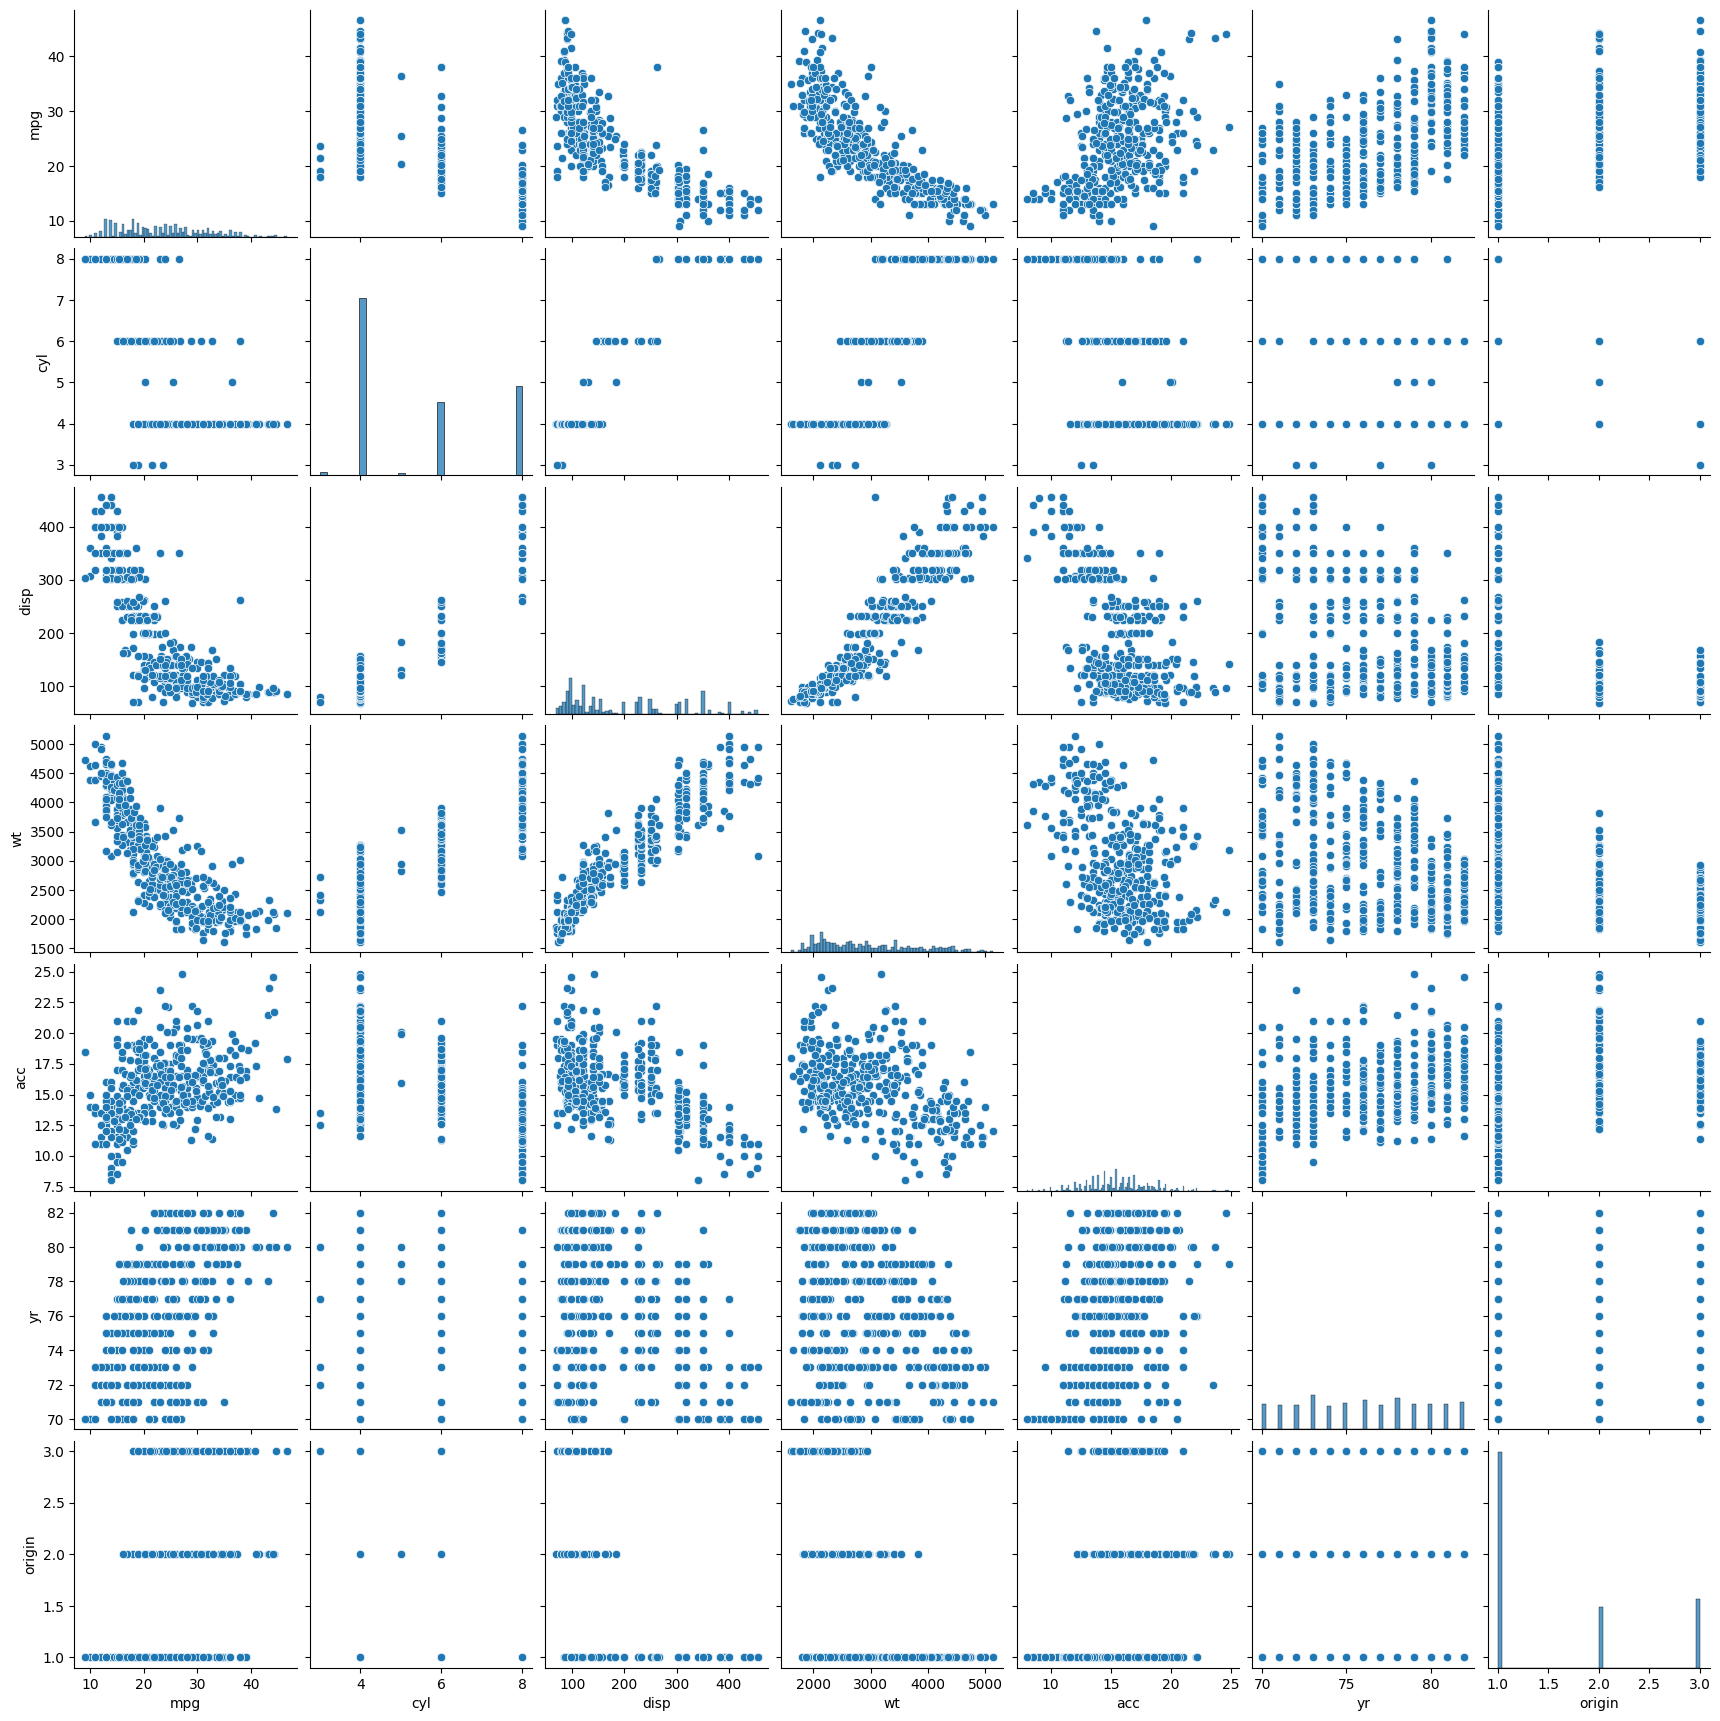

In [10]:
#2C Plot a pairplot for all features

import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot
sns.pairplot(merged_df)
plt.show()


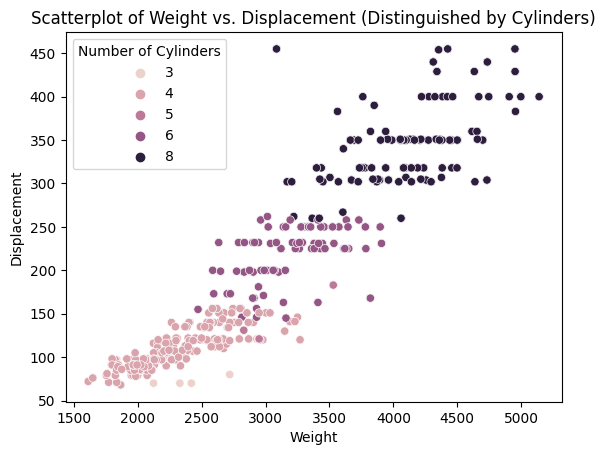

In [11]:
#2D Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’

# Create scatterplot with 'wt' and 'disp' distinguished by 'cyl'
sns.scatterplot(data=merged_df, x='wt', y='disp', hue='cyl')
plt.title('Scatterplot of Weight vs. Displacement (Distinguished by Cylinders)')
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.legend(title='Number of Cylinders')
plt.show()


2E INSIGHTS:

1. Trends Across Different Numbers of Cylinders:

-)The scatterplot clearly shows distinct clusters of data points corresponding to different numbers of cylinders

-)Vehicles with a higher number of cylinders (e.g., 8 cylinders) tend to have both higher weights and higher displacements compared to vehicles with fewer cylinders (e.g., 4 cylinders)

-)As the number of cylinders increases, there appears to be a trend of increasing weight and displacement.

2. Variability Within Each Cylinder Group:

-)Within each group of cylinders, there is variability in both weight and displacement. This suggests that factors other than the number of cylinders also influence these characteristics

-)For example, even among vehicles with 4 cylinders, there is a range of weights and displacements, indicating differences in vehicle types, models, or other specifications

3. Outliers and Anomalies:

There are some outliers visible in the scatterplot, represented by data points that are far from the main cluster of points. These outliers may represent unique or unusual vehicles that deviate significantly from the typical patterns observed in the dataset

4. Overlap Between Cylinder Groups:

There is some overlap between the clusters of data points corresponding to different numbers of cylinders, particularly between vehicles with 6 cylinders and vehicles with 8 cylinders. This suggests that weight and displacement alone may not fully distinguish between vehicles with different numbers of cylinders

5. Relationship Between Weight and Displacement:

Generally, there appears to be a positive correlation between weight and displacement, regardless of the number of cylinders. This suggests that heavier vehicles tend to have larger engine displacements, which is expected as larger engines typically contribute to higher vehicle weights.

Overall, this scatterplot provides valuable insights into how weight and displacement vary across different numbers of cylinders, highlighting patterns and trends that can inform further analysis and understanding of the dataset

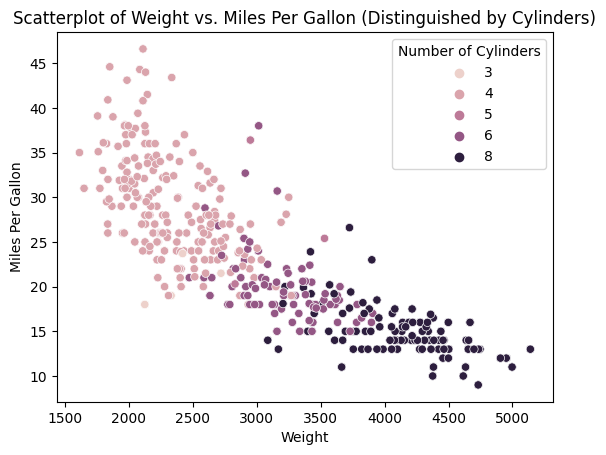

In [12]:
#2F Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

# Create scatterplot with 'wt' and 'mpg' distinguished by 'cyl'
sns.scatterplot(data=merged_df, x='wt', y='mpg', hue='cyl')
plt.title('Scatterplot of Weight vs. Miles Per Gallon (Distinguished by Cylinders)')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')
plt.legend(title='Number of Cylinders')
plt.show()


2G INSIGHTS:

1. Fuel Efficiency Trends Across Different Numbers of Cylinders:

-)The scatterplot shows distinct clusters of data points corresponding to different numbers of cylinders

-)Generally, vehicles with fewer cylinders (e.g., 4 cylinders) tend to have higher miles per gallon (mpg) compared to vehicles with more cylinders (e.g., 8 cylinders)

-)This trend is consistent with the expectation that vehicles with fewer cylinders are often more fuel-efficient

2. Weight and Fuel Efficiency Relationship:

-)There is a negative correlation between weight ('wt') and miles per gallon ('mpg'). Heavier vehicles tend to have lower fuel efficiency, regardless of the number of cylinders

-)However, within each group of cylinders, there is still variability in fuel efficiency. This indicates that factors other than weight and number of cylinders also influence fuel efficiency

3. Overlap Between Cylinder Groups:

-)Similar to the previous scatterplot, there is some overlap between the clusters of data points corresponding to different numbers of cylinders

-)This suggests that weight and fuel efficiency alone may not fully distinguish between vehicles with different numbers of cylinders

4. Outliers and Anomalies:

As before, there are some outliers visible in the scatterplot. These outliers may represent unique or unusual vehicles with unexpected combinations of weight and fuel efficiency

5. Interpretation by Cylinder Group:

Observing each cylinder group separately, the negative correlation between weight and fuel efficiency is consistent across all groups, but the overall ranges and averages vary based on the number of cylinders

This scatterplot provides valuable insights into the relationships between weight, fuel efficiency, and the number of cylinders, helping to understand how these factors interact and influence each other in vehicles.



In [13]:
#2H Check for unexpected values in all the features and datapoints with such values
#[Hint: ‘?’ is present in ‘hp’]

# Define a list to store indices of rows with unexpected values
rows_with_unexpected_values = []

# Iterate through each feature
for feature in merged_df.columns:
    # Check if the feature has non-numeric values
    if merged_df[feature].dtype == 'object':
        unexpected_values = merged_df[merged_df[feature] == '?']
        if not unexpected_values.empty:
            rows_with_unexpected_values.extend(unexpected_values.index.tolist())

# Remove duplicate indices
rows_with_unexpected_values = list(set(rows_with_unexpected_values))

# Display rows with unexpected values
if rows_with_unexpected_values:
    print("Rows with unexpected values:")
    print(merged_df.loc[rows_with_unexpected_values])
else:
    print("No unexpected values found in the dataset.")

Rows with unexpected values:
                           car_name   mpg  cyl   disp hp    wt   acc  yr  \
155650            dodge charger 2.2  25.0    4   98.0  ?  2046  19.0  71   
40970       volkswagen super beetle  23.0    4  151.0  ?  3035  20.5  82   
139276                  mazda glc 4  23.0    4  151.0  ?  3035  20.5  82   
32        chevrolet chevelle malibu  25.0    4   98.0  ?  2046  19.0  71   
24608           ford pinto runabout  40.9    4   85.0  ?  1835  17.3  80   
...                             ...   ...  ...    ... ..   ...   ...  ..   
98282              mazda glc deluxe  23.0    4  151.0  ?  3035  20.5  82   
40950       volkswagen super beetle  34.5    4  100.0  ?  2320  15.8  81   
139256                  mazda glc 4  34.5    4  100.0  ?  2320  15.8  81   
32762   toyouta corona mark ii (sw)  21.0    6  200.0  ?  2875  17.0  74   
131068          honda civic 1500 gl  21.0    6  200.0  ?  2875  17.0  74   

        origin  
155650       1  
40970        1  
139276 

In [14]:
# Replace '?' with NaN in the 'hp' column
merged_df['hp'] = merged_df['hp'].replace('?', np.nan)

# Convert 'hp' column to numeric
merged_df['hp'] = pd.to_numeric(merged_df['hp'])

# Impute missing values in 'hp' column with median value
median_hp = merged_df['hp'].median()
merged_df['hp'].fillna(median_hp, inplace=True)


In [15]:
# Define a list to store indices of rows with unexpected values
rows_with_unexpected_values = []

# Define a list of unexpected values to check for
unexpected_values_list = ['?', -999]  # Add any other unexpected values if applicable

# Iterate through each feature
for feature in merged_df.columns:
    # Check if the feature has unexpected values
    unexpected_values = merged_df[merged_df[feature].isin(unexpected_values_list)]
    if not unexpected_values.empty:
        rows_with_unexpected_values.extend(unexpected_values.index.tolist())

# Remove duplicate indices
rows_with_unexpected_values = list(set(rows_with_unexpected_values))

# Display rows with unexpected values
if rows_with_unexpected_values:
    print("Rows with unexpected values:")
    print(merged_df.loc[rows_with_unexpected_values])
else:
    print("No unexpected values found in the dataset.")

No unexpected values found in the dataset.


In [16]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

# Selecting the features for scaling and clustering
features_for_clustering = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']

# Extracting the features for scaling and clustering
X = merged_df[features_for_clustering]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)


In [17]:
#3 A Apply K-Means clustering for 2 to 10 clusters

# Now proceed with K-Means clustering code
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the features for clustering
features_for_clustering = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']

# Extracting the features for clustering
X_scaled = merged_df[features_for_clustering]

# Range of clusters
clusters_range = range(2, 11)
inertia = []  # List to store the inertia (within-cluster sum of squares) for each number of clusters

# Perform K-Means clustering for each number of clusters
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

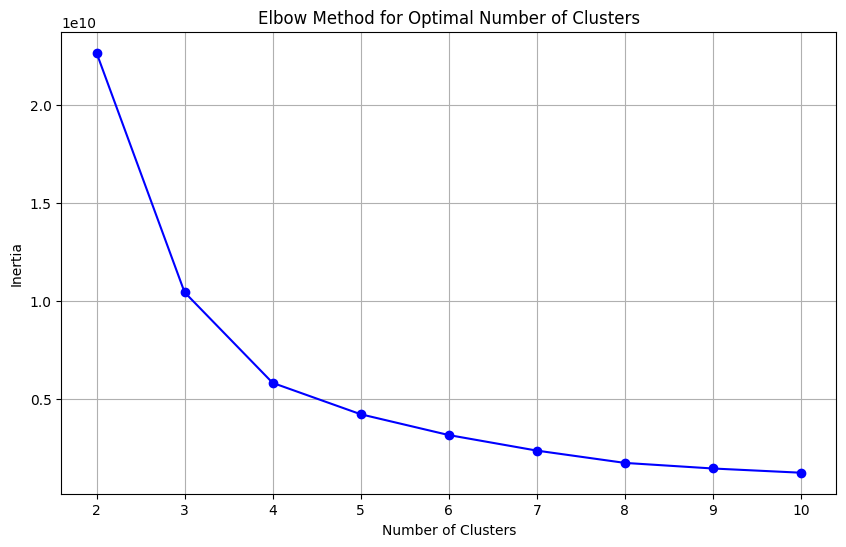

In [18]:
# Plotting the Elbow Method to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(clusters_range)
plt.grid(True)
plt.show()

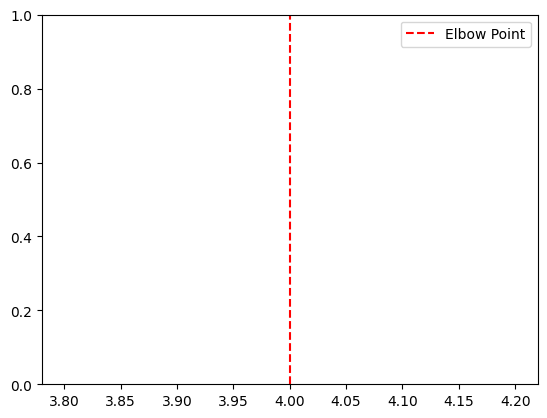

Elbow Point: 4


In [19]:
#3B Plot a visual and find elbow point

# Find the elbow point
from kneed import KneeLocator
kneedle = KneeLocator(list(clusters_range), inertia, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("Elbow Point:", elbow_point)

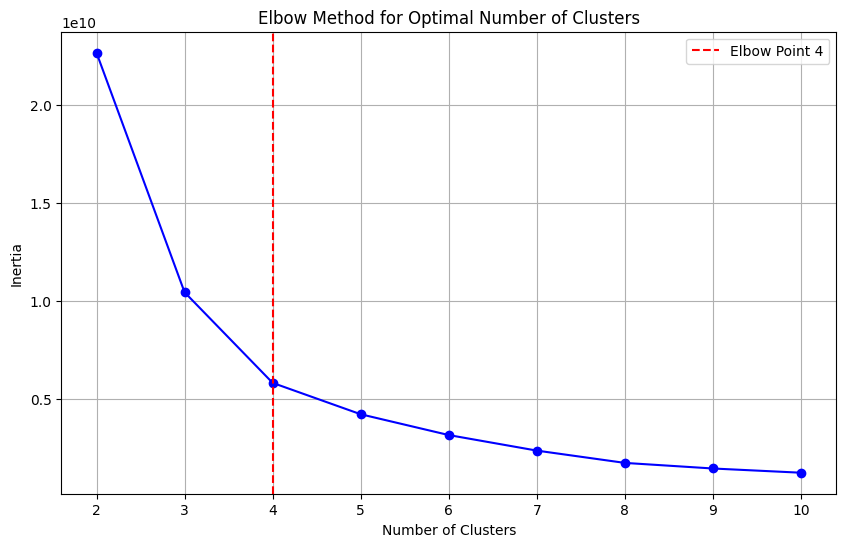

Elbow Point: 4


In [20]:
#3C On the above visual, highlight which are the possible Elbow points

# Plotting the Elbow Method to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(clusters_range)
plt.grid(True)

# Find the elbow points using KneeLocator
kneedle = KneeLocator(list(clusters_range), inertia, curve='convex', direction='decreasing')
elbow_point = kneedle.knee

# Highlight the elbow point on the plot
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow Point {elbow_point}')

plt.legend()
plt.show()

print("Elbow Point:", elbow_point)

In [21]:
#3D Train a K-means clustering model once again on the optimal number of clusters

# Train K-Means clustering model on the optimal number of clusters

# Optimal number of clusters determined from the Elbow Method
optimal_num_clusters = elbow_point

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)

# Fit KMeans to the scaled data
kmeans.fit(X_scaled)


KMeans(n_clusters=4, random_state=42)

In [22]:
# Get cluster labels
cluster_labels = kmeans.labels_


In [23]:
# Add cluster labels to the DataFrame
merged_df['Cluster'] = cluster_labels


In [24]:
# Display the first few rows of the DataFrame with cluster labels
print("DataFrame with Cluster Labels:")
print(merged_df.head())


DataFrame with Cluster Labels:
                    car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1  chevrolet chevelle malibu  15.0    8  350.0  165.0  3693  11.5  70       1   
2  chevrolet chevelle malibu  18.0    8  318.0  150.0  3436  11.0  70       1   
3  chevrolet chevelle malibu  16.0    8  304.0  150.0  3433  12.0  70       1   
4  chevrolet chevelle malibu  17.0    8  302.0  140.0  3449  10.5  70       1   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [25]:
#3E Add a new feature in the DataFrame which will have labels based upon cluster value

# Define a function to assign labels based on cluster values
def assign_cluster_label(cluster):
    if cluster == 0:
        return 'Cluster 1'
    elif cluster == 1:
        return 'Cluster 2'
    elif cluster == 2:
        return 'Cluster 3'
    



In [26]:
# Apply the function to create a new column with cluster labels
merged_df['Cluster Label'] = merged_df['Cluster'].apply(assign_cluster_label)

In [27]:
# Display the DataFrame with the new feature
print("DataFrame with Cluster Labels:")
print(merged_df.head())


DataFrame with Cluster Labels:
                    car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1  chevrolet chevelle malibu  15.0    8  350.0  165.0  3693  11.5  70       1   
2  chevrolet chevelle malibu  18.0    8  318.0  150.0  3436  11.0  70       1   
3  chevrolet chevelle malibu  16.0    8  304.0  150.0  3433  12.0  70       1   
4  chevrolet chevelle malibu  17.0    8  302.0  140.0  3449  10.5  70       1   

   Cluster Cluster Label  
0        1     Cluster 2  
1        1     Cluster 2  
2        1     Cluster 2  
3        1     Cluster 2  
4        1     Cluster 2  


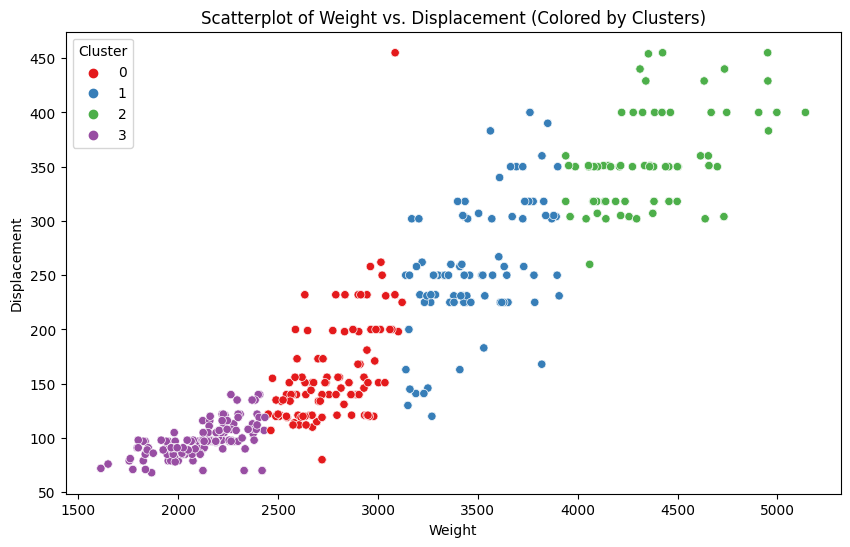

In [28]:
#3F Plot a visual and color the datapoints based upon clusters

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the data points with colors based on clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='wt', y='disp', hue='Cluster', palette='Set1')
plt.title('Scatterplot of Weight vs. Displacement (Colored by Clusters)')
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.legend(title='Cluster')
plt.show()


In [29]:
#3G Pass a new DataPoint and predict which cluster it belongs to

# Example new data point (replace this with your actual new data point)
new_data_point = [23.0, 4, 122.0, 86.0, 2220.0, 15.5, 76, 1]

# 1. Preprocess the new data point (convert to DataFrame with same columns as training data)
new_df = pd.DataFrame([new_data_point], columns=features_for_clustering)

# 2. Scale the new data point using the same scaler
new_scaled = scaler.transform(new_df)

# 3. Predict the cluster label for the new data point using the trained K-Means model
predicted_cluster = kmeans.predict(new_scaled)

print("Predicted Cluster for the New Data Point:", predicted_cluster)


Predicted Cluster for the New Data Point: [3]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# PART B #

# Data Understanding & Cleaning #

In [30]:
# 1A Read 'vehicle.csv' and save as DataFrame
df = pd.read_csv('/Users/apple/Downloads/vehicle.csv')


In [31]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [32]:
# 1B. Check the percentage of missing values and impute them
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:\n", missing_percentage)


Percentage of missing values:
 compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [33]:
# imputing missing values in numerical columns with their respective means
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


In [34]:
# Check percentage of missing values after imputation
missing_percentage_after_imputation = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values after imputation:\n", missing_percentage_after_imputation)


Percentage of missing values after imputation:
 compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64


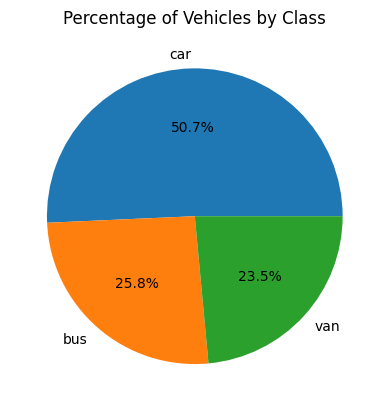

Percentage of values for variable 'class':
 car    5.993998
bus    3.045901
van    2.780432
Name: class, dtype: float64


In [35]:
# 1C. Visualize a Pie-chart and print the percentage of values for the variable 'class'
class_percentage = df['class'].value_counts() / len(df) * 100
# Visualize the pie chart
import matplotlib.pyplot as plt
plt.pie(class_percentage, labels=class_percentage.index, autopct='%1.1f%%')
plt.title('Percentage of Vehicles by Class')
plt.show()
print("Percentage of values for variable 'class':\n", (class_percentage / len(df)) * 100)


In [36]:
# 1D. Check for duplicate rows in the data and handle them
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


# Data Preparation #

In [37]:
#2 A Split data into X and Y. [Train and Test optional]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [38]:
# Split the data into X and Y
X = df.drop('class', axis=1)
y = df['class']

In [39]:
X

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195


In [40]:
y

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object

In [41]:
# Optionally split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# 2B. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Building #

In [43]:
#3A Train a base Classification model using SVM

from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np

# A. Train a base Classification model using SVM
svm_base = SVC()
svm_base.fit(X_train_scaled, y_train)


SVC()

In [44]:
# Predict the labels for the test set
y_pred = svm_base.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [45]:
# 3B Print Classification metrics for the train data
from sklearn.metrics import classification_report
print("Base SVM Model Performance:")
print(classification_report(y_train, svm_base.predict(X_train_scaled)))


Base SVM Model Performance:
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       1.00      0.97      0.98       351
         van       0.93      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.97       676
weighted avg       0.98      0.98      0.98       676



In [46]:
# 3C. Apply PCA on the data with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)


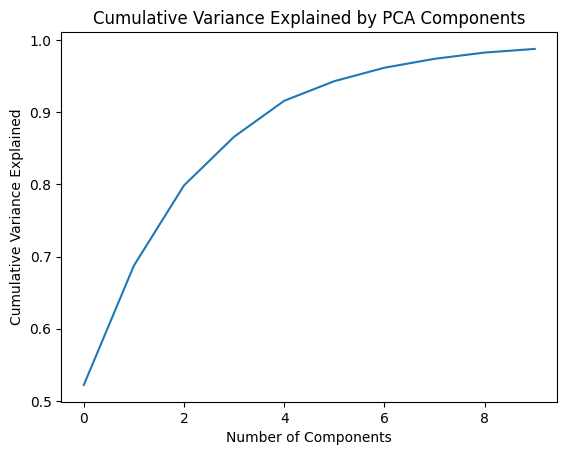

In [47]:
# 3D. Visualize Cumulative Variance Explained with Number of Components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA Components')
plt.show()


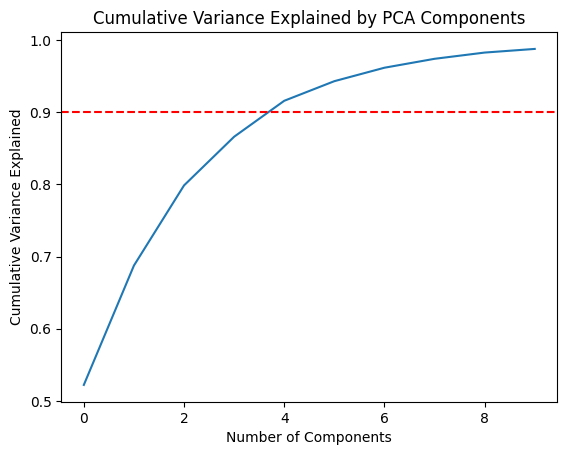

In [48]:
# 3E. Draw a horizontal line on the plot to highlight the threshold of 90%
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()


In [49]:
# 3F. Apply PCA on the data again, selecting minimum components with 90% or above variance explained
pca_threshold = PCA(n_components=0.9)
X_train_pca_threshold = pca_threshold.fit_transform(X_train_scaled)

In [50]:
# 3G. Train an SVM model on the components selected from the previous step
svm_pca = SVC()
svm_pca.fit(X_train_pca_threshold, y_train)


SVC()

In [51]:
# 3H. Print Classification metrics for the train data of the above model
print("SVM Model with PCA Performance:")
print(classification_report(y_train, svm_pca.predict(X_train_pca_threshold)))


SVM Model with PCA Performance:
              precision    recall  f1-score   support

         bus       0.86      0.71      0.78       166
         car       0.85      0.89      0.87       351
         van       0.71      0.77      0.73       159

    accuracy                           0.82       676
   macro avg       0.81      0.79      0.79       676
weighted avg       0.82      0.82      0.81       676



# Performance Improvement #

In [52]:
#4A Train another SVM on the components out of PCA. Tune the parameters to improve performance

from sklearn.model_selection import RandomizedSearchCV

# A. Train another SVM model on the components obtained from PCA. Tune the parameters to improve performance
param_dist = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

In [53]:
random_search = RandomizedSearchCV(SVC(), param_dist, n_iter=10, cv=5, random_state=42)


In [54]:
random_search.fit(X_train_pca_threshold, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42)

In [55]:
# 4B. Share the best parameters observed
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [56]:
# 4C. Print Classification metrics for the train data of the above model
print("SVM Model with PCA and Randomized Parameters Performance:")
print(classification_report(y_train, random_search.predict(X_train_pca_threshold)))


SVM Model with PCA and Randomized Parameters Performance:
              precision    recall  f1-score   support

         bus       0.92      0.92      0.92       166
         car       0.94      0.96      0.95       351
         van       0.93      0.88      0.91       159

    accuracy                           0.93       676
   macro avg       0.93      0.92      0.93       676
weighted avg       0.93      0.93      0.93       676



# Data Understanding & Cleaning #

5A Explain pre-requisite/assumptions of PCA

1. Linearity: PCA assumes that the relationships between variables are linear. This means that if the data has nonlinear relationships, PCA may not be the best choice, as it could lead to misleading results

2. Scale Consistency: PCA is sensitive to the scale of the variables. Therefore, it's essential to standardize or normalize the variables before performing PCA. This ensures that variables with larger scales do not dominate the principal components solely due to their scale

3. Mean-Centered Data: PCA works best with mean-centered data. Centering the data involves subtracting the mean of each variable from the corresponding values. This step ensures that the first principal component represents the direction of maximum variance

4. Large Variance Directions: PCA assumes that directions with the largest variance in the data are the most important. The principal components are ordered in terms of the amount of variance they explain. This assumption implies that the first few principal components capture most of the variability in the data

5. Orthogonality: PCA assumes that the principal components are orthogonal to each other, meaning they are uncorrelated. This property ensures that each principal component captures a different aspect of the variation in the data

6. Normality: While PCA does not strictly require the data to be normally distributed, it performs best when the data is approximately normally distributed. If the data significantly deviates from normality, other techniques like Factor Analysis might be more appropriate

7. Noisy Variables: PCA is sensitive to noisy variables. If the dataset contains variables that are noisy or contain irrelevant information, it may affect the performance of PCA by introducing noise into the principal components



5B Explain advantages and limitations of PCA

ADVANTAGES:

1. Dimensionality Reduction: PCA reduces the dimensionality of the data by transforming it into a new coordinate system where the axes represent the principal components. This reduction in dimensionality simplifies the data while retaining most of its variability, making it easier to analyze and visualize

2. Feature Extraction: PCA identifies the underlying structure in the data by finding the directions (principal components) that capture the most variance. These principal components can be interpreted as new features that are linear combinations of the original variables. This feature extraction can reveal important patterns and relationships in the data

3. Data Visualization: PCA can be used for data visualization by plotting the data points in the reduced-dimensional space defined by the principal components. This visualization can help identify clusters, outliers, and trends in the data, making it easier to interpret complex datasets

4. Decorrelation: PCA ensures that the principal components are orthogonal to each other, meaning they are uncorrelated. This property simplifies the interpretation of the transformed data and can help identify the underlying factors driving the variation in the dataset

5. Noise Reduction: PCA can help reduce the impact of noise and irrelevant information in the data by focusing on the directions of maximum variance. By retaining only the most informative components, PCA can improve the signal-to-noise ratio in the data

DISADVANTAGES:

1. Linearity Assumption: PCA assumes that the relationships between variables are linear. If the data contains nonlinear relationships, PCA may not capture the underlying structure effectively, leading to loss of information or misleading results

2. Scale Sensitivity: PCA is sensitive to the scale of the variables. Variables with larger scales can dominate the principal components, potentially biasing the results. It's essential to standardize or normalize the variables before applying PCA to ensure that all variables contribute equally

3. Loss of Interpretability: While PCA simplifies the data by reducing its dimensionality, the resulting principal components may not always have clear interpretations in terms of the original variables. This loss of interpretability can make it challenging to understand the underlying factors driving the variation in the data

4. Orthogonality Constraint: PCA enforces orthogonality among the principal components, which may not always be appropriate for certain datasets. In some cases, allowing for correlated components (e.g., using techniques like Factor Analysis) may provide a better representation of the data

5. Gaussian Assumption: PCA works best when the data follows a Gaussian distribution. If the data significantly deviates from normality, PCA may not perform optimally, and alternative techniques may be more suitable